# Conv NN to classify CIFAR-100 images
Dataset of 50,000 32x32 color training images, labeled over 100 categories, and 10,000 test images.

In [1]:
!pip install keras

    100% |████████████████████████████████| 327kB 2.3MB/s 


### Import dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import  cifar100

Using TensorFlow backend.


In [3]:
(trainImages, trainLabels), (testImages, testLabels) = cifar100.load_data()

169009152/169001437 [==============================] - 13s 0us/step


In [4]:
print(trainImages.shape)
print(trainLabels.shape)
print(testImages.shape)
print(testImages.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


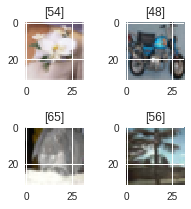

In [5]:
fig = plt.figure(figsize=(3,3))
fig_col = 2
fig_row = 2
fig.add_subplot(fig_row, fig_col, 1)
plt.imshow(trainImages[1000])
plt.title(trainLabels[1000])
fig.add_subplot(fig_row, fig_col, 2)
plt.imshow(trainImages[10000])
plt.title(trainLabels[10000])
fig.add_subplot(fig_row, fig_col, 3)
plt.imshow(testImages[1000])
plt.title(testLabels[1000])
fig.add_subplot(fig_row, fig_col, 4)
plt.imshow(testImages[5000])
plt.title(testLabels[5000])
fig.subplots_adjust(hspace=0.8, wspace=0.5)
plt.show()

### Prepare dataset

In [0]:
from keras.utils import to_categorical

In [7]:
trainImages = trainImages.astype(np.float32) / 255
trainLabels = to_categorical(trainLabels, num_classes=100)
testImages = testImages.astype(np.float32) / 255
testLabels = to_categorical(testLabels, num_classes=100)
print(trainImages.shape)
print(trainLabels.shape)
print(testImages.shape)
print(testLabels.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


### Prepare the model

In [0]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.layers import Dense, Flatten
from keras.layers import ZeroPadding2D, Input
from keras.layers import BatchNormalization
from keras import optimizers, losses
from keras.models import Model
from keras import backend as K


In [0]:
K.set_image_data_format('channels_last')

In [10]:
m, h, w, c = trainImages.shape
input_shape = (h, w, c)
print(input_shape)

(32, 32, 3)


In [0]:
def create_model(input_shape=(32, 32, 3), num_classes=100):
  # Create input tensor
  X = Input(input_shape)
  Y = ZeroPadding2D((3,3))(X)
  
  # add conv layers
  Y = Conv2D(128, (3, 3), padding='same')(Y)
  Y = Activation('relu')(Y)
  Y = Conv2D(128, (3, 3), padding='valid')(Y)
  Y = Activation('relu')(Y)
  Y = MaxPooling2D(pool_size=(2, 2))(Y)
  Y = Dropout(rate=0.1)(Y)
  Y = BatchNormalization(axis=3)(Y)
  
  Y = Conv2D(256, (3, 3), padding='same')(Y)
  Y = Activation('relu')(Y)
  Y = Conv2D(256, (3, 3), padding='valid')(Y)
  Y = Activation('relu')(Y)
  Y = MaxPooling2D(pool_size=(2, 2))(Y)
  Y = Dropout(rate=0.25)(Y)
  Y = BatchNormalization(axis=3)(Y)
  
  Y = Conv2D(512, (3, 3), padding='same')(Y)
  Y = Activation('relu')(Y)
  Y = Conv2D(512, (3, 3), padding='valid')(Y)
  Y = Activation('relu')(Y)
  Y = MaxPooling2D(pool_size=(2, 2))(Y)
  Y = Dropout(rate=0.5)(Y)
  Y = BatchNormalization(axis=3)(Y)
  
  # Fully conncted layer
  Y = Flatten()(Y)
  Y = Dense(1024)(Y)
  Y = Activation('relu')(Y)
  Y = Dropout(rate=0.5)(Y)
  Y = Dense(num_classes)(Y)
  Y = Activation('softmax')(Y)
  
  model = Model(inputs=X, outputs=Y)
  return model

In [0]:
K.clear_session()
model = create_model(input_shape, num_classes=100)

### Compile and fit the model

In [0]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [14]:
history = model.fit(x=trainImages,
                    y=trainLabels,
                    batch_size=128,
                    epochs=50,
                    validation_data=(testImages, testLabels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 93s 2ms/step - loss: 4.2048 - acc: 0.0742 - val_loss: 3.6755 - val_acc: 0.1435
Epoch 2/50
19328/50000 [==========>...................] - ETA: 50s - loss: 3.6731 - acc: 0.1391

50000/50000 [==============================] - 87s 2ms/step - loss: 3.5383 - acc: 0.1602 - val_loss: 3.2612 - val_acc: 0.2064
Epoch 3/50
45952/50000 [==========================>...] - ETA: 6s - loss: 3.1073 - acc: 0.2362

50000/50000 [==============================] - 87s 2ms/step - loss: 3.0962 - acc: 0.2385 - val_loss: 2.9804 - val_acc: 0.2603
Epoch 4/50
50000/50000 [==============================] - 87s 2ms/step - loss: 2.7404 - acc: 0.3034 - val_loss: 2.5086 - val_acc: 0.3513
Epoch 5/50
 3584/50000 [=>............................] - ETA: 1:16 - loss: 2.4951 - acc: 0.3530

50000/50000 [==============================] - 87s 2ms/step - loss: 2.4699 - acc: 0.3590 - val_loss: 2.2313 - val_acc: 0.4131
Epoch 6/50
39936/50000 [======================>.......] - ETA: 16s - loss: 2.2691 - acc: 0.4001

50000/50000 [==============================] - 87s 2ms/step - loss: 2.2631 - acc: 0.4026 - val_loss: 2.1454 - val_acc: 0.4379
Epoch 7/50
50000/50000 [==============================] - 87s 2ms/step - loss: 2.0884 - acc: 0.4387 - val_loss: 1.9402 - val_acc: 0.4816
Epoch 8/50
 2176/50000 [>.............................] - ETA: 1:18 - loss: 1.8891 - acc: 0.4899

50000/50000 [==============================] - 87s 2ms/step - loss: 1.9305 - acc: 0.4754 - val_loss: 1.9424 - val_acc: 0.4741
Epoch 9/50
39424/50000 [======================>.......] - ETA: 17s - loss: 1.8075 - acc: 0.5022

50000/50000 [==============================] - 87s 2ms/step - loss: 1.8063 - acc: 0.5014 - val_loss: 1.8949 - val_acc: 0.4879
Epoch 10/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.6712 - acc: 0.5347 - val_loss: 1.7845 - val_acc: 0.5203
Epoch 11/50
 1920/50000 [>.............................] - ETA: 1:18 - loss: 1.4973 - acc: 0.5609

50000/50000 [==============================] - 87s 2ms/step - loss: 1.5692 - acc: 0.5605 - val_loss: 1.7480 - val_acc: 0.5325
Epoch 12/50
39168/50000 [======================>.......] - ETA: 17s - loss: 1.4422 - acc: 0.5896

50000/50000 [==============================] - 87s 2ms/step - loss: 1.4603 - acc: 0.5846 - val_loss: 1.6086 - val_acc: 0.5606
Epoch 13/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.3759 - acc: 0.6042 - val_loss: 1.6544 - val_acc: 0.5559
Epoch 14/50
 1920/50000 [>.............................] - ETA: 1:18 - loss: 1.2430 - acc: 0.6391

50000/50000 [==============================] - 87s 2ms/step - loss: 1.3009 - acc: 0.6217 - val_loss: 1.6385 - val_acc: 0.5652
Epoch 15/50
39168/50000 [======================>.......] - ETA: 17s - loss: 1.2276 - acc: 0.6410

50000/50000 [==============================] - 87s 2ms/step - loss: 1.2355 - acc: 0.6394 - val_loss: 1.5763 - val_acc: 0.5713
Epoch 16/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.1492 - acc: 0.6611 - val_loss: 1.4889 - val_acc: 0.5921
Epoch 17/50
 1920/50000 [>.............................] - ETA: 1:18 - loss: 1.0125 - acc: 0.6990

50000/50000 [==============================] - 87s 2ms/step - loss: 1.0889 - acc: 0.6751 - val_loss: 1.5391 - val_acc: 0.5926
Epoch 18/50
39168/50000 [======================>.......] - ETA: 17s - loss: 1.0073 - acc: 0.6968

50000/50000 [==============================] - 87s 2ms/step - loss: 1.0197 - acc: 0.6941 - val_loss: 1.5378 - val_acc: 0.5897
Epoch 19/50
50000/50000 [==============================] - 87s 2ms/step - loss: 0.9793 - acc: 0.7066 - val_loss: 1.5422 - val_acc: 0.6001
Epoch 20/50
 1920/50000 [>.............................] - ETA: 1:19 - loss: 0.8807 - acc: 0.7234

50000/50000 [==============================] - 87s 2ms/step - loss: 0.9165 - acc: 0.7223 - val_loss: 1.4912 - val_acc: 0.6029
Epoch 21/50
39168/50000 [======================>.......] - ETA: 17s - loss: 0.8618 - acc: 0.7383

50000/50000 [==============================] - 87s 2ms/step - loss: 0.8722 - acc: 0.7361 - val_loss: 1.5472 - val_acc: 0.5935
Epoch 22/50
50000/50000 [==============================] - 87s 2ms/step - loss: 0.8352 - acc: 0.7447 - val_loss: 1.4602 - val_acc: 0.6068
Epoch 23/50
 1920/50000 [>.............................] - ETA: 1:19 - loss: 0.7266 - acc: 0.7776

50000/50000 [==============================] - 87s 2ms/step - loss: 0.7918 - acc: 0.7553 - val_loss: 1.5297 - val_acc: 0.5987
Epoch 24/50
39168/50000 [======================>.......] - ETA: 17s - loss: 0.7416 - acc: 0.7712

50000/50000 [==============================] - 87s 2ms/step - loss: 0.7565 - acc: 0.7662 - val_loss: 1.5527 - val_acc: 0.6021
Epoch 25/50
50000/50000 [==============================] - 87s 2ms/step - loss: 0.7252 - acc: 0.7738 - val_loss: 1.5220 - val_acc: 0.6040
Epoch 26/50
 1920/50000 [>.............................] - ETA: 1:18 - loss: 0.6197 - acc: 0.8078

50000/50000 [==============================] - 87s 2ms/step - loss: 0.6819 - acc: 0.7858 - val_loss: 1.4864 - val_acc: 0.6145
Epoch 27/50
39168/50000 [======================>.......] - ETA: 17s - loss: 0.6522 - acc: 0.7952

50000/50000 [==============================] - 87s 2ms/step - loss: 0.6605 - acc: 0.7935 - val_loss: 1.4934 - val_acc: 0.6184
Epoch 28/50
50000/50000 [==============================] - 87s 2ms/step - loss: 0.6430 - acc: 0.7992 - val_loss: 1.5737 - val_acc: 0.6115
Epoch 29/50
 1920/50000 [>.............................] - ETA: 1:18 - loss: 0.5669 - acc: 0.8208

50000/50000 [==============================] - 87s 2ms/step - loss: 0.6091 - acc: 0.8098 - val_loss: 1.4686 - val_acc: 0.6270
Epoch 30/50
39168/50000 [======================>.......] - ETA: 17s - loss: 0.5820 - acc: 0.8162

50000/50000 [==============================] - 87s 2ms/step - loss: 0.5884 - acc: 0.8145 - val_loss: 1.4977 - val_acc: 0.6155
Epoch 31/50
50000/50000 [==============================] - 87s 2ms/step - loss: 0.5621 - acc: 0.8206 - val_loss: 1.5288 - val_acc: 0.6139
Epoch 32/50
 1920/50000 [>.............................] - ETA: 1:18 - loss: 0.4913 - acc: 0.8542

50000/50000 [==============================] - 87s 2ms/step - loss: 0.5499 - acc: 0.8272 - val_loss: 1.5009 - val_acc: 0.6126
Epoch 33/50
39168/50000 [======================>.......] - ETA: 17s - loss: 0.5170 - acc: 0.8354

50000/50000 [==============================] - 87s 2ms/step - loss: 0.5279 - acc: 0.8314 - val_loss: 1.5223 - val_acc: 0.6201
Epoch 34/50
50000/50000 [==============================] - 87s 2ms/step - loss: 0.5044 - acc: 0.8404 - val_loss: 1.5475 - val_acc: 0.6213
Epoch 35/50
 1920/50000 [>.............................] - ETA: 1:18 - loss: 0.4702 - acc: 0.8521

50000/50000 [==============================] - 87s 2ms/step - loss: 0.4952 - acc: 0.8420 - val_loss: 1.5247 - val_acc: 0.6268
Epoch 36/50
39168/50000 [======================>.......] - ETA: 18s - loss: 0.4640 - acc: 0.8506

50000/50000 [==============================] - 89s 2ms/step - loss: 0.4753 - acc: 0.8484 - val_loss: 1.5124 - val_acc: 0.6278
Epoch 37/50
50000/50000 [==============================] - 89s 2ms/step - loss: 0.4718 - acc: 0.8501 - val_loss: 1.5222 - val_acc: 0.6278
Epoch 38/50
 1920/50000 [>.............................] - ETA: 1:19 - loss: 0.3976 - acc: 0.8714

50000/50000 [==============================] - 92s 2ms/step - loss: 0.4441 - acc: 0.8591 - val_loss: 1.5491 - val_acc: 0.6299
Epoch 39/50
39168/50000 [======================>.......] - ETA: 18s - loss: 0.4283 - acc: 0.8655

50000/50000 [==============================] - 93s 2ms/step - loss: 0.4347 - acc: 0.8631 - val_loss: 1.5125 - val_acc: 0.6265
Epoch 40/50
50000/50000 [==============================] - 93s 2ms/step - loss: 0.4288 - acc: 0.8646 - val_loss: 1.5125 - val_acc: 0.6381
Epoch 41/50
 1920/50000 [>.............................] - ETA: 1:26 - loss: 0.3646 - acc: 0.8865

50000/50000 [==============================] - 93s 2ms/step - loss: 0.4159 - acc: 0.8667 - val_loss: 1.5024 - val_acc: 0.6391
Epoch 42/50
39168/50000 [======================>.......] - ETA: 18s - loss: 0.4004 - acc: 0.8721

50000/50000 [==============================] - 92s 2ms/step - loss: 0.4063 - acc: 0.8700 - val_loss: 1.5424 - val_acc: 0.6368
Epoch 43/50
50000/50000 [==============================] - 93s 2ms/step - loss: 0.3938 - acc: 0.8746 - val_loss: 1.5904 - val_acc: 0.6258
Epoch 44/50
 1920/50000 [>.............................] - ETA: 1:21 - loss: 0.3573 - acc: 0.8854

50000/50000 [==============================] - 92s 2ms/step - loss: 0.3834 - acc: 0.8783 - val_loss: 1.6196 - val_acc: 0.6194
Epoch 45/50
39168/50000 [======================>.......] - ETA: 19s - loss: 0.3733 - acc: 0.8809

50000/50000 [==============================] - 93s 2ms/step - loss: 0.3797 - acc: 0.8786 - val_loss: 1.5952 - val_acc: 0.6299
Epoch 46/50
50000/50000 [==============================] - 92s 2ms/step - loss: 0.3668 - acc: 0.8830 - val_loss: 1.5639 - val_acc: 0.6337
Epoch 47/50
 1920/50000 [>.............................] - ETA: 1:25 - loss: 0.3478 - acc: 0.8870

50000/50000 [==============================] - 92s 2ms/step - loss: 0.3564 - acc: 0.8863 - val_loss: 1.5482 - val_acc: 0.6355
Epoch 48/50
39168/50000 [======================>.......] - ETA: 18s - loss: 0.3471 - acc: 0.8871

50000/50000 [==============================] - 92s 2ms/step - loss: 0.3537 - acc: 0.8855 - val_loss: 1.5435 - val_acc: 0.6376
Epoch 49/50
50000/50000 [==============================] - 92s 2ms/step - loss: 0.3403 - acc: 0.8911 - val_loss: 1.5907 - val_acc: 0.6286
Epoch 50/50
 1920/50000 [>.............................] - ETA: 1:22 - loss: 0.3112 - acc: 0.9016

50000/50000 [==============================] - 91s 2ms/step - loss: 0.3402 - acc: 0.8918 - val_loss: 1.5466 - val_acc: 0.6334


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


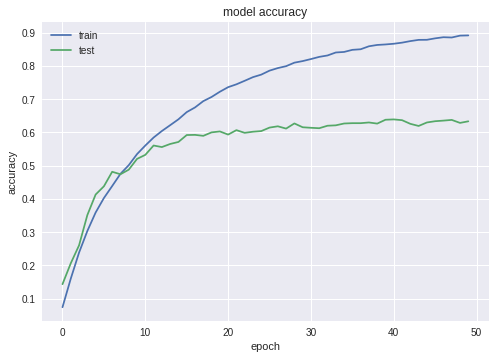

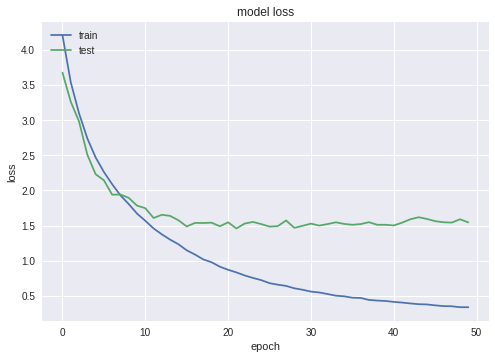

In [15]:
# Plot the graph
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()